<a href="https://colab.research.google.com/github/BKousha/FloorPlanSegmentation/blob/main/mask_to_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Colab Notebooks'
'Copy of Predictive Maintenance Checklist.gdoc'
 FloorPlan_samples
 model_best_val_loss_var.pkl
 Processed_Floor_Plans
 ShotBot
'SNN_soft shadow network for image compositing.pdf'
 test.txt


In [2]:
from tqdm import tqdm
import cv2
import numpy as np
import glob as glob
import os as os
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib as mlp


In [3]:
mask_folder = '/content/drive/MyDrive/Processed_Floor_Plans/FP_processed'
translated_folder = '/content/drive/MyDrive/Processed_Floor_Plans/FP_processed/Category'

In [4]:
color_mapping = {
    (255,255,255):0,     # background
    (244, 31, 46): 1,    # rooms
    (246, 77, 89): 1,    # rooms (alternative RGB definition)
    (70, 247, 22): 2,    # hallway
    (248, 172, 98): 3,   # kitchen
    (182, 112, 80): 3,   # kitchen (alternative RGB definition)
    (244, 190, 96): 3,   # kitchen (alternative RGB definition)
    (252, 226, 49): 4,   # columns
    (182, 11, 80): 5,    # mep
    (116, 53, 54): 5,    # mep
    (136, 208, 216): 6,  # windows
    (129, 219, 227): 6,  # windows
    (131, 217, 225): 6,  # windows
    (57, 52, 251): 7,    # doors
    (42, 75, 97): 7,     # doors
    (97, 97, 110): 7,    # doors
    (207, 81, 216): 8,   # glass_doors
    (223, 79, 165): 8,   # glass_doors
    (153, 109, 89): 9,   # bathrooms
    (128, 73, 48): 9,    # bathrooms
    (214, 194, 223): 10, # elevators
    (199, 184, 185): 10, # elevators (alternative RGB definition)
    (166, 162, 160): 11, # stairs
    (197, 141, 115): 12, # storage
    (193, 113, 77): 12,  # storage
    (105, 104, 159): 13, # elevator_doors
}
mapping_colors = np.array(list(color_mapping.keys()))
mapping_values = np.array(list(color_mapping.values()))

labels = ['background',
          'room',
          'hallway',
          'kitchen',
          'columns',
          'mep',
          'windows',
          'doors',
          'glass_doors',
          'bathrooms',
          'elevators',
          'stairs',
          'storage',
          'elevator_doors'
          ]
category_colors  = ['white',      #background        0
                    'red',        #room              1
                    'lawngreen',  #hallway           2
                    'peru',       #kitchen           3
                    'yellow',     #columns           4
                    'saddlebrown',#mep               5
                    'deepskyblue',#windows           6
                    'blue',       #doors             7
                    'purple',     #glass_doors       8
                    'sienna',     #bathrooms         9
                    'peachpuff',  #elevators         10
                    'gray',       #stairs            11
                    'peachpuff',  # storage          12
                    'purple',     #'elevator_doors'  13
                    ]
Number_Category=14



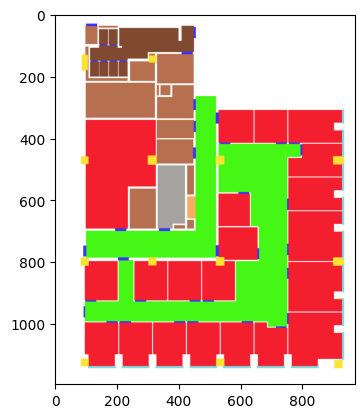

In [5]:
mask = cv2.imread('/content/drive/MyDrive/Processed_Floor_Plans/FP_processed/47.png')#'/content/drive/MyDrive/Processed_Floor_Plans/FP_processed/41.png'
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask)

In [6]:
# print(Number_Category)
# threshold=1
# translated = np.zeros((mask.shape[0],mask.shape[1],len(mapping_colors)), dtype=np.float32)
# for ind in range(len(mapping_colors)):
#   color=mapping_colors[ind]
#   value=mapping_values[ind]
#   color_diff = np.abs(mask - color)
#   tmp=np.all(color_diff <= threshold, axis=-1)*value
#   translated[:,:,ind]=tmp
# translated=np.max(translated,axis=2)
# print(np.unique(translated))
# translated_array = np.zeros(mask.shape[:2], dtype=np.float32)
# for color, value in zip(mapping_colors, mapping_values):
#     color_diff = np.abs(mask - color)
#     mask_match = np.all(color_diff <= threshold, axis=-1)
#     translated_array[mask_match] = value
# print(np.unique(translated))

In [7]:

def translate(mask, threshold=5):
    translated = np.zeros((mask.shape[0],mask.shape[1],len(mapping_colors)), dtype=np.float32)
    for ind in range(len(mapping_colors)):
      color=mapping_colors[ind]
      value=mapping_values[ind]
      color_diff = np.abs(mask - color)
      tmp=np.all(color_diff <= threshold, axis=-1)*value
      translated[:,:,ind]=tmp
    translated=np.max(translated,axis=2)

    return translated

def translate(mask, threshold=5):
  translated = np.zeros(mask.shape[:2], dtype=np.uint8)
  for color, value in zip(mapping_colors, mapping_values):
      color_diff = np.abs(mask - color)
      mask_match = np.all(color_diff <= threshold, axis=-1)
      translated[mask_match] = value
  return translated

# def doit(mask_file):
#   mask = cv2.imread(image)
#   mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

#   translated=translate(mask,threshold=5)
#   image_array_scaled = (translated * 255).astype(np.uint8)

#   folder, filename = os.path.split(image)
#   outputfile=translated_folder+"/"+filename

#   cv2.imwrite(outputfile,image_array_scaled)


  0%|          | 0/292 [00:00<?, ?it/s]

(1195, 970) uint8


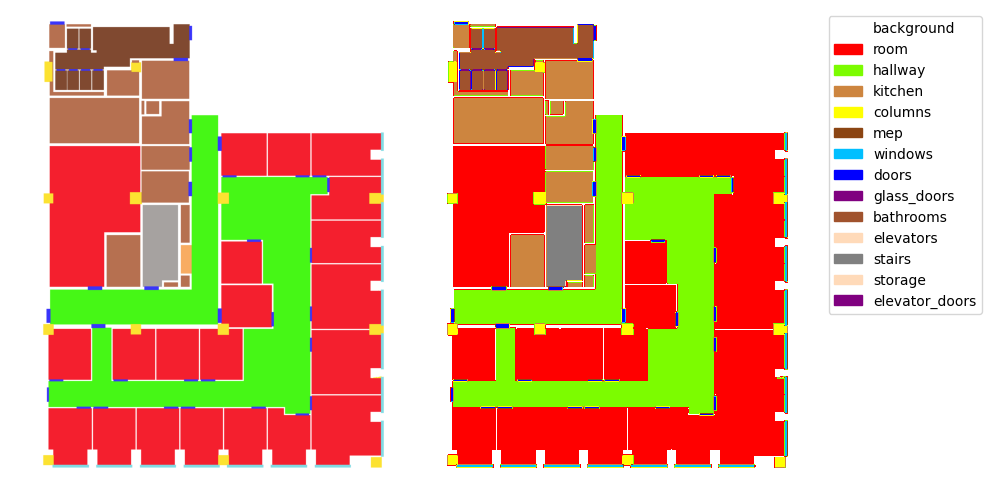

  0%|          | 1/292 [00:10<52:11, 10.76s/it]


KeyboardInterrupt: ignored

In [8]:
cmap = ListedColormap(category_colors)
norm = mlp.colors.BoundaryNorm([-1,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,12.1,13.1,14.1], cmap.N)



image_files = glob.glob(os.path.join(mask_folder, '*.png'))
for image in tqdm(image_files):
  mask = cv2.imread(image)
  mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

  b,g,r = cv2.split(mask)
  shiftet_im = b + 1000 * (g + 1)  + 1000 * 1000 * (r + 1)
  shiftet_im

  translated=translate(mask,threshold=1)
  print(translated.shape,translated.dtype)

  image_array_scaled = ((translated.astype(np.float32)/Number_Category)*255.0).astype(np.uint8)

  folder, filename = os.path.split(image)
  outputfile_png=translated_folder+"/"+filename
  filename, extension = os.path.splitext(filename)
  outputfile_npy=f"{translated_folder}/{filename}.npy"

  cv2.imwrite(outputfile_png,image_array_scaled,[cv2.IMWRITE_PNG_COMPRESSION, 0])
  np.save(outputfile_npy, translated)

  fig, axs = plt.subplots(1, 2, figsize=(10, 10))
  im1 = axs[0].imshow(mask, cmap='rainbow')
  axs[0].axis('off')
  im2 = axs[1].imshow(translated, cmap=cmap,norm=norm)
  axs[1].axis('off')

  # Create a custom legend
  legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(category_colors, labels)]
  axs[1].legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.05, 1))



  plt.tight_layout()
  plt.show()

In [ ]:
# mask = cv2.imread(image)#'/content/drive/MyDrive/Processed_Floor_Plans/FP_processed/Category/41.png'
# mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

# translated = cv2.imread(outputfile_png,cv2.IMREAD_GRAYSCALE)#'/content/drive/MyDrive/Processed_Floor_Plans/FP_processed/Category/41.png'

# translated = ((translated.astype(np.float32)/ 255.0)*Number_Category)

# fig, axs = plt.subplots(1, 2, figsize=(20, 20))
# im1 = axs[0].imshow(mask, cmap='rainbow')
# axs[0].axis('off')
# im2 = axs[1].imshow(translated, cmap=cmap,norm=norm)
# axs[1].axis('off')

# # Create a custom legend
# legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(category_colors, labels)]
# axs[1].legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.05, 1))



# plt.tight_layout()
# plt.show()



In [ ]:
# mask = cv2.imread(image)#'/content/drive/MyDrive/Processed_Floor_Plans/FP_processed/Category/41.png'
# mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

# translated_1=translate(mask,threshold=1)


# translated_2 = cv2.imread(outputfile_png,cv2.IMREAD_GRAYSCALE)#'/content/drive/MyDrive/Processed_Floor_Plans/FP_processed/Category/41.png'

# translated_2 = ((translated_2.astype(np.float32)/ 255.0)*Number_Category)
# tmp=np.abs(translated_1-translated_2)
# print(tmp.sum())
# plt.imshow(tmp)

# fig, axs = plt.subplots(1, 2, figsize=(20, 20))
# im1 = axs[0].imshow(mask, cmap='rainbow')
# axs[0].axis('off')
# im2 = axs[1].imshow(translated_1, cmap=cmap,norm=norm)
# axs[1].axis('off')

# # Create a custom legend
# legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(category_colors, labels)]
# axs[1].legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.05, 1))



# plt.tight_layout()
# plt.show()

In [ ]:
# print(outputfile_npy)
# translated_2 = np.load(outputfile_npy)#'/content/drive/MyDrive/Processed_Floor_Plans/FP_processed/Category/41.png'
# print(translated_2.shape,translated_2.dtype)
# tmp=np.abs(translated_1-translated_2)
# print(tmp.sum())
# plt.imshow(tmp)



# fig, axs = plt.subplots(1, 2, figsize=(20, 20))
# im1 = axs[0].imshow(mask, cmap='rainbow')
# axs[0].axis('off')
# im2 = axs[1].imshow(translated_2, cmap=cmap,norm=norm)
# axs[1].axis('off')

# # Create a custom legend
# legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(category_colors, labels)]
# axs[1].legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.05, 1))



# plt.tight_layout()
# plt.show()

